# Working with shapes

Note that the material here is not specifically connected to maps. The shapes could be on any plane. However, the tasks like those presented here are often used in GIS work, so 

In [5]:
from __future__ import print_function   # Python 2/3 compatability

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

### 0D shapes: Points

In [6]:
point = shapely.geometry.Point(0.2, 1.0)

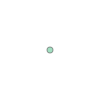

In [7]:
# Notice, the ipython '__repr__' (representation) displays the point as the output
point

In [8]:
# See some of the point attributes
print(point.geom_type)
print(point.area)
print(point.length)
print(point.bounds)
print(point.coords)   # explore this object...
print(point.coords[:])

Point
0.0
0.0
(0.2, 1.0, 0.2, 1.0)
[(0.2, 1.0)]


In [9]:
# A collection of random points...
point1 = shapely.geometry.Point(0.2, 1.0)
point2 = shapely.geometry.Point(0.1, 0.2)
point3 = shapely.geometry.Point(0.5, 0.0)
point4 = shapely.geometry.Point(0.8, 0.5)

In [10]:
# We can see the distance of the points from one another
point1.distance(point2)

0.806225774829855

### 1D shapes: Lines and Rings

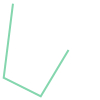

In [11]:
# An ordered sequence of points is a `LineString'
line = shapely.geometry.LineString((point1, point2, point3, point4))
line

In [12]:
# To make a closed shape, use a `LinearRing'

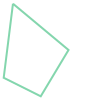

In [13]:
closed_line = shapely.geometry.LinearRing(line)
closed_line

In [14]:
# Some of the attributes of the LinearRing..
print(closed_line.area)   # no area since it is not 'filled'
print(closed_line.length) # the perimeter of the shape
print(closed_line.bounds) # an xy-plane bounding box

0.0
2.61755952741
(0.1, 0.0, 0.8, 1.0)


### 2D shapes, Polygons and Buffers

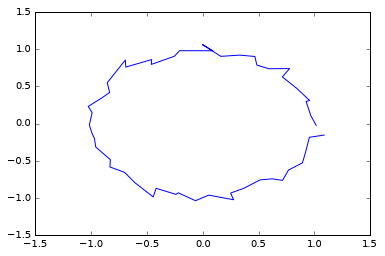

In [15]:
# Let's make a circule, with some noise

N = 50

x = np.cos(np.linspace(0, 2.0*np.pi, N+1))[:-1] + 0.05*np.random.randn(50)
y = np.sin(np.linspace(0, 2.0*np.pi, N+1))[:-1] + 0.05*np.random.randn(50)

plt.plot(x, y, '-')


Self-intersection at or near point 0.082831756350693037 0.97843408915630958


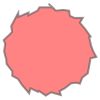

In [16]:
xy = zip(x, y)
poly = shapely.geometry.Polygon(xy)
poly

3.05985068122
POINT (-0.006841685584394011 -0.007923316944943285)
False True


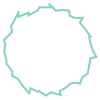

In [17]:
# Some of the Polygon attributes
print(poly.area)
print(poly.centroid)
print(poly.contains(point1), poly.contains(point2))
poly.boundary

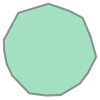

In [18]:
poly.convex_hull

We can also create 2D objects by adding buffers to existing 0D and 1D objects

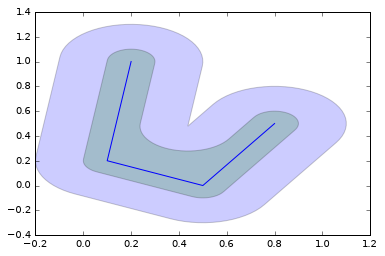

In [19]:
dialated = line.buffer(0.3)
eroded = dialated.buffer(-0.2)

plt.plot(*line.xy)
plt.fill(*dialated.boundary.xy, alpha=0.2)
plt.fill(*eroded.boundary.xy, alpha=0.2)

### Operations

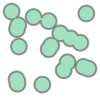

In [168]:
# First, let's make a collection of fat points.
xy = np.random.rand(20, 2)
points = shapely.geometry.MultiPoint(xy).buffer(0.1)
points

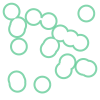

In [169]:
regions = shapely.ops.linemerge(points.boundary)
regions

In [166]:
line = shapely.geometry.LineString([(0, 0), (1, 1)])
intersections = [poly.intersects(line) for poly in regions]

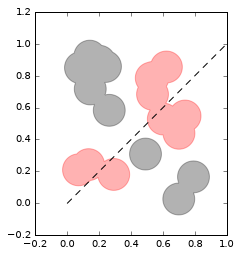

In [167]:
for poly in regions:
    if poly.intersects(line):
        color = 'r'
    else:
        color = 'k'
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)


x, y = zip(*line.coords[:])
plt.plot(x, y, '--k')
plt.gca().set_aspect(1.0)

In [162]:
line.coords[:]

[(0.0, 0.0), (1.0, 1.0)]

In [173]:
print(line.wkt)
# print(regions.wkt)   # big barf of text...

LINESTRING (0 0, 1 1)


---
### *Exercise*

> What states do you fly over when you fly from LA to NYC?

> LAX: 33.9425° N, 118.4081° W

> EWR: 40.6925° N, 74.1686° W 



Load in the states_21basic shapefile using these commands:

    from mpl_toolkits.basemap import Basemap
    m = Basemap(llcrnrlon=-150.,llcrnrlat=20.,
            urcrnrlon=-50.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',
            lat_0=40.,lon_0=-100.,lat_ts=20.)
    m.readshapefile('states_21basic/states', 'states')
    
The boundary information for all of the states is how held in an attribute of the map object `m.states`, that is a list of lists of x-y pairs denoting the boundaries. Then use the `m.gcpoints` function to get the points along the great circle path. Convert all of these things into Shapely objects, and check for intersections.

BONUS: Add a buffer of 100km to the flight path to see what states you might potentially see along the way.

---